In [ ]:
pip install ktrain

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import ktrain
from ktrain import text

In [ ]:
categories = ["Human", "GPT4", "GPT3"]

In [ ]:
data = pd.read_csv("/all_data.csv")

In [ ]:
data.head()

,text,domain,name,kind,model
0,"I favor preparing meals at home. Primarily, it...",TOEFL_gpt4polished_91,Fake TOEFL - GPT4 - PE,AI-Generated,GPT4
1,The destination I'm most eager to explore is o...,TOEFL_gpt4polished_91,Fake TOEFL - GPT4 - PE,AI-Generated,GPT4
2,I envision my life ten years from now as one o...,TOEFL_gpt4polished_91,Fake TOEFL - GPT4 - PE,AI-Generated,GPT4
3,"Personally, I find Peking University to be inc...",TOEFL_gpt4polished_91,Fake TOEFL - GPT4 - PE,AI-Generated,GPT4
4,I'm confident in pursuing my passion. While I ...,TOEFL_gpt4polished_91,Fake TOEFL - GPT4 - PE,AI-Generated,GPT4


In [ ]:
X = data["text"].tolist()
y = data["model"].tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
model_name = 'distilbert-base-uncased'
trans = text.Transformer(model_name, maxlen=512, class_names=categories)

In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 181
	95percentile : 625
	99percentile : 650


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 182
	95percentile : 630
	99percentile : 814


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=16 )

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
37/37 [==============================] - 36s 966ms/step - loss: 0.6582 - accuracy: 0.7111
Epoch 2/10
37/37 [==============================] - 34s 924ms/step - loss: 0.5612 - accuracy: 0.7564
Epoch 3/10
37/37 [==============================] - 34s 924ms/step - loss: 0.4571 - accuracy: 0.7976
Epoch 4/10
37/37 [==============================] - 34s 920ms/step - loss: 0.3684 - accuracy: 0.8405
Epoch 5/10
37/37 [==============================] - 34s 917ms/step - loss: 0.4970 - accuracy: 0.8010
Epoch 6/10
37/37 [==============================] - 34s 918ms/step - loss: 1.1385 - accuracy: 0.3911
Epoch 7/10
37/37 [==============================] - 34s 911ms/step - loss: 1.1050 - accuracy: 0.4220
Epoch 8/10
37/37 [==============================] - 30s 796ms/step - loss: 18.8373 - accuracy: 0.4046


done.
Visually inspect loss plot and select learning rate associated with falling loss


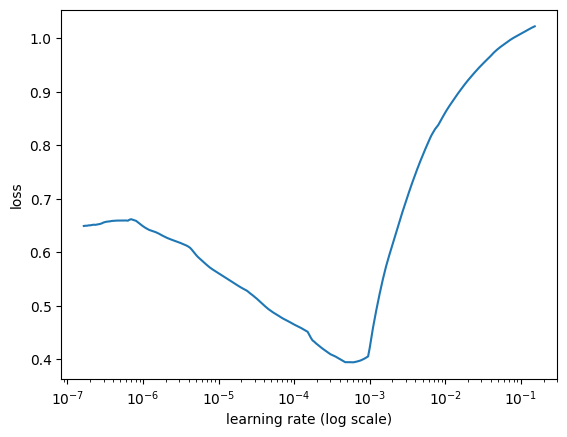

In [ ]:
learner.lr_find(show_plot=True, max_epochs = 10)

In [ ]:
learner.fit_onecycle(1e-4, 100)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/100
38/38 [==============================] - 50s 1s/step - loss: 0.8557 - accuracy: 0.5893 - val_loss: 0.5982 - val_accuracy: 0.7000
Epoch 2/100
38/38 [==============================] - 37s 984ms/step - loss: 0.4357 - accuracy: 0.7880 - val_loss: 0.4881 - val_accuracy: 0.8267
Epoch 3/100
38/38 [==============================] - 37s 977ms/step - loss: 0.2632 - accuracy: 0.8932 - val_loss: 0.2948 - val_accuracy: 0.8933
Epoch 4/100
38/38 [==============================] - 39s 1s/step - loss: 0.1442 - accuracy: 0.9549 - val_loss: 0.2191 - val_accuracy: 0.9200
Epoch 5/100
38/38 [==============================] - 37s 980ms/step - loss: 0.0949 - accuracy: 0.9683 - val_loss: 0.2824 - val_accuracy: 0.9067
Epoch 6/100
38/38 [==============================] - 37s 984ms/step - loss: 0.0499 - accuracy: 0.9866 - val_loss: 0.2168 - val_accuracy: 0.9400
Epoch 7/100
38/38 [==============================] - 37s 982ms/step - loss: 0.

In [ ]:
learner.validate(class_names=categories)

5/5 [==============================] - 4s 591ms/step
              precision    recall  f1-score   support

       Human       0.93      0.88      0.90        42
        GPT4       0.89      0.94      0.92        52
        GPT3       1.00      0.98      0.99        56

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



array([[37,  5,  0],
       [ 3, 49,  0],
       [ 0,  1, 55]])

/usr/local/lib/python3.10/dist-packages/ktrain/core.py:786: UserWarning: Validation value for val_accuracy wasn't found in history
  warnings.warn(


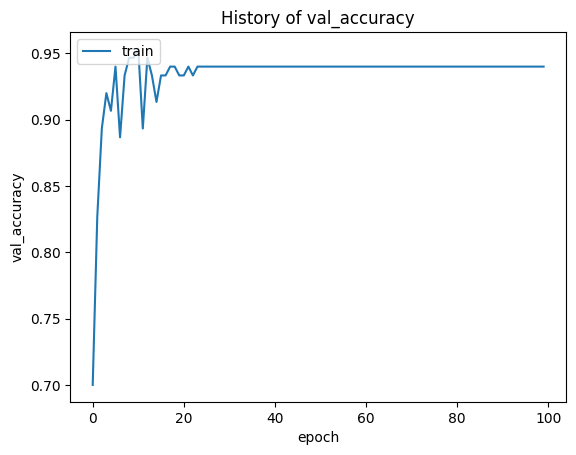

In [ ]:
learner.plot('val_accuracy')

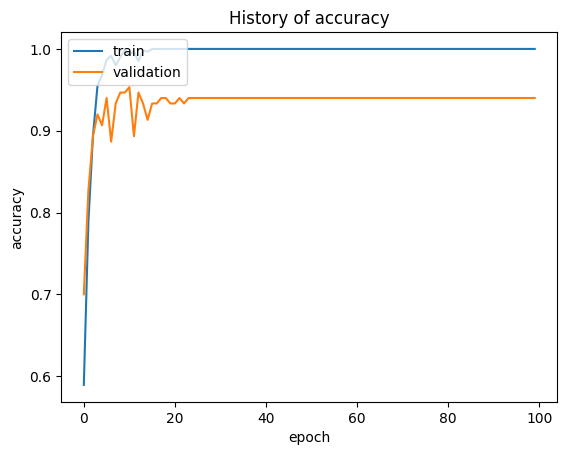

In [ ]:
learner.plot('accuracy')

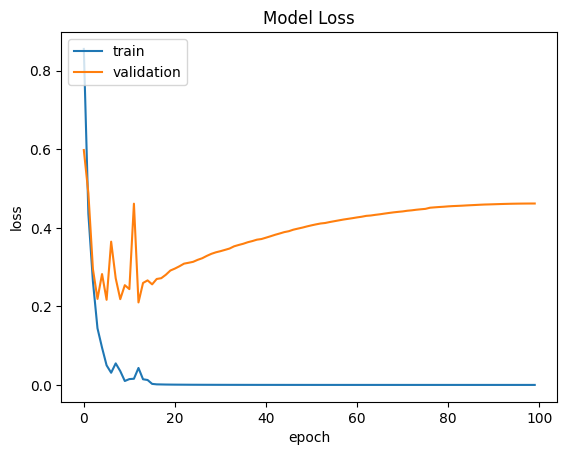

In [ ]:
learner.plot('loss')

In [ ]:
learner.view_top_losses(n=5, preproc=trans)

5/5 [==============================] - 3s 600ms/step
----------
id:89 | loss:11.2 | true:GPT4 | pred:GPT3)

----------
id:62 | loss:11.17 | true:GPT4 | pred:GPT3)

----------
id:123 | loss:10.94 | true:Human | pred:GPT4)

----------
id:135 | loss:9.43 | true:GPT3 | pred:GPT4)

----------
id:109 | loss:9.12 | true:GPT3 | pred:GPT4)



In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
x = "The 1998 FIFA World Cup final was the final match of the 32-team 1998 FIFA World Cup, played on 12 July at the Stade de France (pictured) in Paris, France, between defending champions Brazil and hosts France. Before the match, speculation surrounded the fitness of striker Ronaldo, who was at first left out of Brazil's starting line-up, only to be restored before kick-off. France took the lead shortly before the half-hour mark, when Zinedine Zidane outjumped Leonardo to connect with a header from an in-swinging corner from the right taken by Emmanuel Petit. Zidane scored again, with another header from a corner, shortly before half-time to give France a 2–0 lead. Petit then added a third goal in second-half injury time, striking the ball low into the net following a pass by Patrick Vieira, to complete a 3–0 win for France, giving them their first World Cup title."

In [1]:
predictor.predict(x)

NameError: ignored

In [ ]:
predictor.save("distilbert-ai-classification")